# Projeto de Ciência de Dados

## 📌 Definição do problema

O objetivo deste projeto é **explorar e analisar dados relacionados á saúde e aos hábitos de vida**, com o intuito de **identificar padrões que possam influenciar a qualidade do sono e o nível de atividade física**. A partir dessa análise, espera-se obter insights relevantes que possam contribuir para a melhoria da saúde e bem-estar das pessoas.

## 📊 Visão Geral doa Dados

O conjunto de daods inclui informações sobre:

 - Identificação do usuário
 - Idade e gênero
 - Qualidade do sono (Sleep Quality)
 - Horário de dormir e de acordar
 - Nível de atividade física e número de passos diários
 - Calorias queimadas
 - Hábitos alimentares
 - Presença de distribuição do sono
 - Uso de medicação
   

Essa diversidade de variável permitirá realizar análise exploratórias, investigar correlações e contruir modelos preditivos para entender os fatores que mais influenciam a qualidade do sono e o nível de atividade física.

In [427]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [428]:
# Carregando os dados 
df = pd.read_csv("dados.csv")

In [429]:
# Exiba as primeiras lihas do DataFrame
print('Primeiras linhas dos dados:')
df.head()

Primeiras linhas dos dados:


,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [430]:
# Exibir o tamanho do dataset
print(f' O dataset contém: {df.shape[0]} linhas e {df.shape[1]} colunas.')

 O dataset contém: 100 linhas e 12 colunas.


### Dimensão do Conjunto de Dados

O conjunto de dados possui 100 linhas (individuos) e 13 colunas (variáveis), o que nos fornece uma quantidade adequada de informações para realizar uma análise e construir um modelo preditivo de regressão.

In [432]:
# Verificar dados duplicados
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')

Número de linhas duplicadas: 0


### Verificação de dados Duplicados

Foi realizada a verificação de registro duplicados no conjunto de dados. Essa etapa é essencial para garantir que cada linha represente um indivíduo único, evitando distorções nas anãlises e no modelo de regressão.

Após a verificação, nenhum registro duplicado foi encontrado.


In [434]:
# Informações gerais sobre o DataFrame
print('Informações sobre os dados:\n')
df.info()

Informações sobre os dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


### Verificação dos Tipos de Dados
Obeservamos que as colunas **Bedtime** e **Wake-up time** estão como object, mas representam informações de tempo. Precisamos convertê-las para o tipo **datetime** para facilitar cálculos como a duração do sono.

**Tratar Variáveis Categóricas:** Converter as colunas catégoricas para um formato numérico que os modelos de machine learning possam entender. A técnica de 'one-hot encoding' é uma boa abordagem aqui.

In [436]:
# Converter Bedtime e Wake-up Time para datetime 
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%H:%M')
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time'], format='%H:%M')

# Calculando a duração do sono em horas
df['Sleep Duration'] = (
    (df['Wake-up Time'] - df['Bedtime'])
    .apply(lambda x: x if x.total_seconds() >= 0 else x + pd.Timedelta(days=1))
    .dt.total_seconds() / 3600
)

In [437]:
# Exibir as primeiras linhas com a nova coluna
df[['Wake-up Time', 'Bedtime', 'Sleep Duration']].head()

,Wake-up Time,Bedtime,Sleep Duration
0,1900-01-01 06:30:00,1900-01-01 23:00:00,7.5
1,1900-01-01 07:00:00,1900-01-01 00:30:00,6.5
2,1900-01-01 06:45:00,1900-01-01 22:45:00,8.0
3,1900-01-01 06:30:00,1900-01-01 01:00:00,5.5
4,1900-01-01 07:00:00,1900-01-01 23:30:00,7.5


In [438]:
# Conferindo os tipos das colunas após a tranformação 
df.dtypes

User ID                             int64
Age                                 int64
Gender                             object
Sleep Quality                       int64
Bedtime                    datetime64[ns]
Wake-up Time               datetime64[ns]
Daily Steps                         int64
Calories Burned                     int64
Physical Activity Level            object
Dietary Habits                     object
Sleep Disorders                    object
Medication Usage                   object
Sleep Duration                    float64
dtype: object

In [439]:
# Estatísticas descritivas das colunas númericas
print('Estatísticas decritivas:\n')
df.describe()

Estatísticas decritivas:



,User ID,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Sleep Duration
count,100.000000,100.000000,100.000000,100,100,100.000000,100.00000,100.000000
mean,50.500000,36.010000,7.000000,1900-01-01 11:52:03.000000256,1900-01-01 06:51:36.000000256,6830.000000,2421.00000,6.992500
min,1.000000,22.000000,4.000000,1900-01-01 00:15:00,1900-01-01 06:00:00,3000.000000,2000.00000,4.500000
25%,25.750000,28.750000,5.750000,1900-01-01 00:56:15,1900-01-01 06:30:00,4750.000000,2175.00000,6.437500
50%,50.500000,35.000000,7.500000,1900-01-01 11:45:00,1900-01-01 07:00:00,6750.000000,2400.00000,7.000000
75%,75.250000,44.000000,8.250000,1900-01-01 22:48:45,1900-01-01 07:03:45,9000.000000,2700.00000,8.000000
max,100.000000,50.000000,9.000000,1900-01-01 23:45:00,1900-01-01 07:30:00,11000.000000,2900.00000,9.000000
std,29.011492,8.454865,1.734964,NaN,NaN,2498.706736,281.06759,1.164205


### Análise Da Estatísticas Descritivas Dos Dados:

- A coluna **(User ID)** é apenas um identificador e não será útil para a modelagem.
- A idade **(Age)** varia de 22 a 50 anos, com uma média de 36 anos.
- A qualidade do sono **(Sleep Quality)**  tem uma média de 7, com valores variados de 4 a 9.
- Os passos diários **(Daily Steps)** variam bastante, de 3000 a 11000, com uma média de 6830.
- As calorias queimadas **(Calories Burned)** também apresentam variação considerável, de 2000 a 2900, com uma média de 2421.

In [505]:
# Seleciona apenas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Dicionário para armazenar os outliers encontrados
outliers_detectados = {}

# Loop para calcular IQR e detectar outliers
for coluna in colunas_numericas:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtra os outliers
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
    
    # Salva no dicionário se houver outliers
    if not outliers.empty:
        outliers_detectados[coluna] = outliers

# Exibe os outliers encontrados
if outliers_detectados:
    for coluna, valores in outliers_detectados.items():
        print(f"\nOutliers na coluna '{coluna}':")
        print(valores)
else:
    print("Nenhum outlier detectado com base no IQR.")


Nenhum outlier detectado com base no IQR.


### Análise de Outliers

Com base na descrição estatística das variáveis numéricas, foi realizadas uma análise preliminar para detectar outliers utilizando o intervalo interquartílico (IQR).

 - **Idade (Age):** Distribuição normal, sem outliers aparentes.
 - **Qualidade do Sono (Sleep Quality):** Valores dentro dos limites esperados.
 - **Passos Diários (Daily Steps):** Os valores entre 3000 e 11000. Embora o mínimo de 3000 esteja abaixo da média, ainda está dentro dos limites estatísticos e pode representar um dia sedentário real.
 - **Calorias Gastas (Calories Burned):** Sem indícios de outliers. Valores coerentes com a atividade físicas.
 - **Duração do Sono (Sleep Duration):** O valor mínimo (4.5 horas está no limite inferior, o que pode indicar um sono curto extremo, mas ainda plausível dentro da realiadde.


Em resumo, não foram identificados outliers graves ou inconsistências que justifiquem a remoção ou o tratamento desses dados. Todos os valores parecem representar situaçõ reais do cotidiano.

In [441]:
# Exibir os valores únicos para cada coluna 
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].unique()}')

Gender: ['f' 'm']
Physical Activity Level: ['medium' 'low' 'high']
Dietary Habits: ['healthy' 'unhealthy' 'medium']
Sleep Disorders: ['no' 'yes']
Medication Usage: ['no' 'yes']


### Verificação dos Valores Únicos por Coluna

Foi realizada a verificação dos valores únicos nas colunas categóricas do conjunto de dados. Todos os valores estão corretos e dentro do esperado, indicando que não há erros de digitação ou categorias inconsistentes.
Essa verificação é essencial para garantir a integridade dos dados antes de aplicar técnicas de codificação e construir o modelo de regressão.

In [443]:
# Verificando dados ausentes
print('Valores ausentes por coluna:\n')
df.isnull().sum()

Valores ausentes por coluna:



User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
Sleep Duration             0
dtype: int64

### Verificação dos Valores Ausentes
A boa noticia é que não há valores ausentes o código mostra zero para todas as colunas. Isso simplifica um pouco a etapa de limpeza.

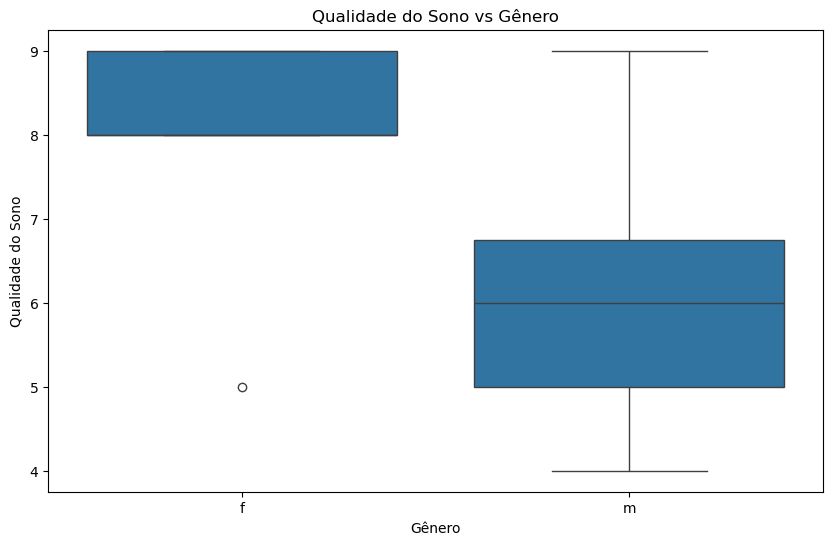

In [515]:
# Média da Qualidade do Sono vs Gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y= 'Sleep Quality', data=df,)
plt.title('Qualidade do Sono vs Gênero')
plt.xlabel('Gênero')
plt.ylabel('Qualidade do Sono')
plt.show()

### Insights relevante:

Embora o gráfico não explique por que isso acontece, ele evidencia uma desigualdade entre os gêneros em relação á qualidade do sono. Mulheres, nessa amostra, parecm desfrutar de um sono de melhor qualidade.

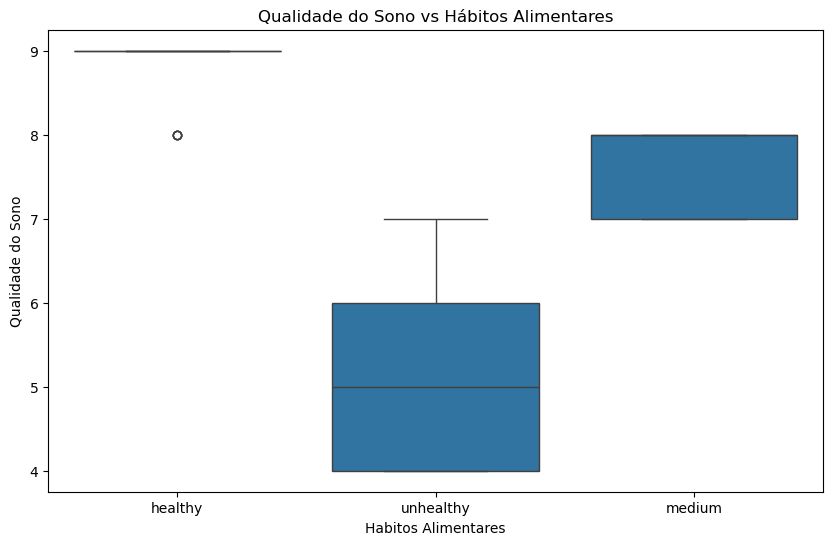

In [517]:
# Qualidade do Sono vs Hábitos Alimentares
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dietary Habits', y='Sleep Quality', data=df)
plt.title('Qualidade do Sono vs Hábitos Alimentares')
plt.xlabel('Habitos Alimentares')
plt.ylabel('Qualidade do Sono')
plt.show()

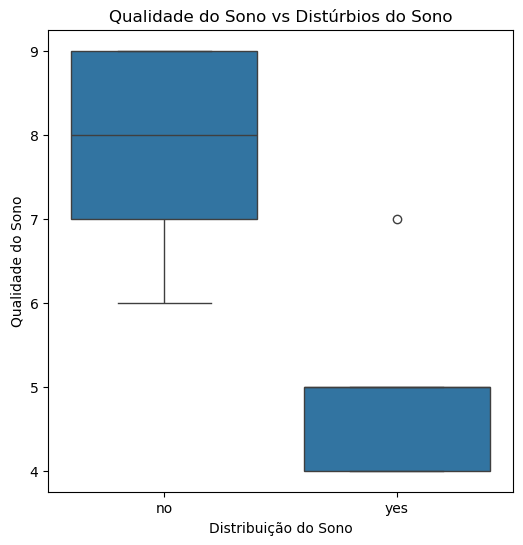

In [447]:
# Qualidade do Sono vs Distúrbios do Sono
plt.figure(figsize=(6, 6))
sns.boxplot(x='Sleep Disorders', y='Sleep Quality', data=df)
plt.title('Qualidade do Sono vs Distúrbios do Sono')
plt.xlabel('Distribuição do Sono')
plt.ylabel('Qualidade do Sono')
plt.show()

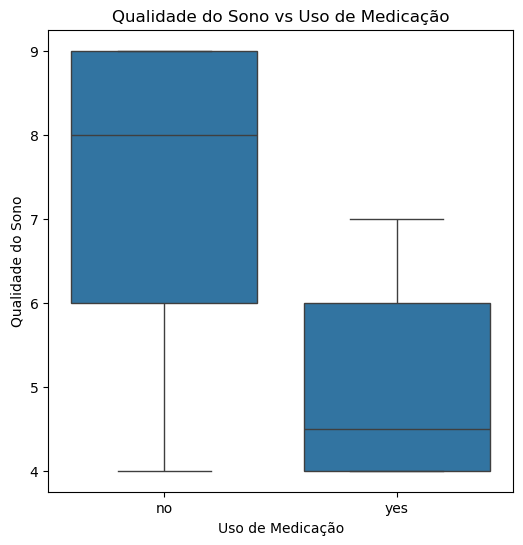

In [448]:
# Qualidade do Sono vs Uso de Medicação
plt.figure(figsize=(6, 6))
sns.boxplot(x='Medication Usage', y='Sleep Quality', data=df)
plt.title('Qualidade do Sono vs Uso de Medicação')
plt.xlabel('Uso de Medicação')
plt.ylabel('Qualidade do Sono')
plt.show()

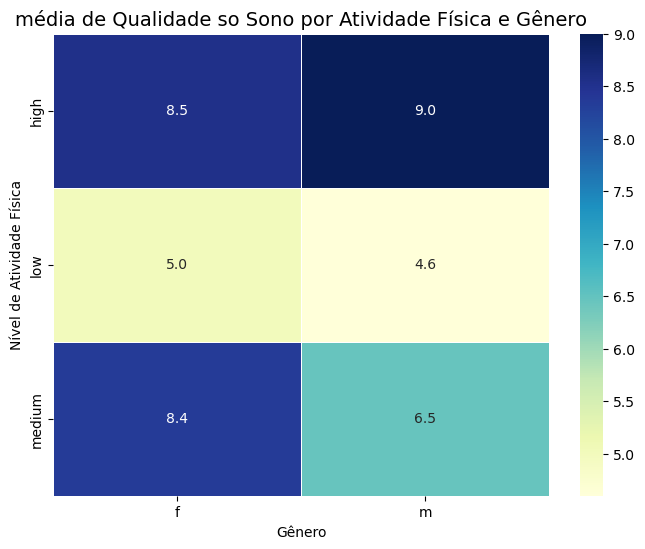

In [449]:
# Qualidade do Sono vs Atividade Física por Gênero
pivot_table = df.pivot_table(
    values='Sleep Quality',
    index='Physical Activity Level',
    columns='Gender',
    aggfunc='mean'
)
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True, # Mostra valores nas células
    fmt='.1f', # 1 casa decimal
    cmap='YlGnBu',
    linewidths=0.5
)
plt.title('média de Qualidade so Sono por Atividade Física e Gênero', fontsize=14)
plt.xlabel('Gênero')
plt.ylabel('Nível de Atividade Física')
plt.show()

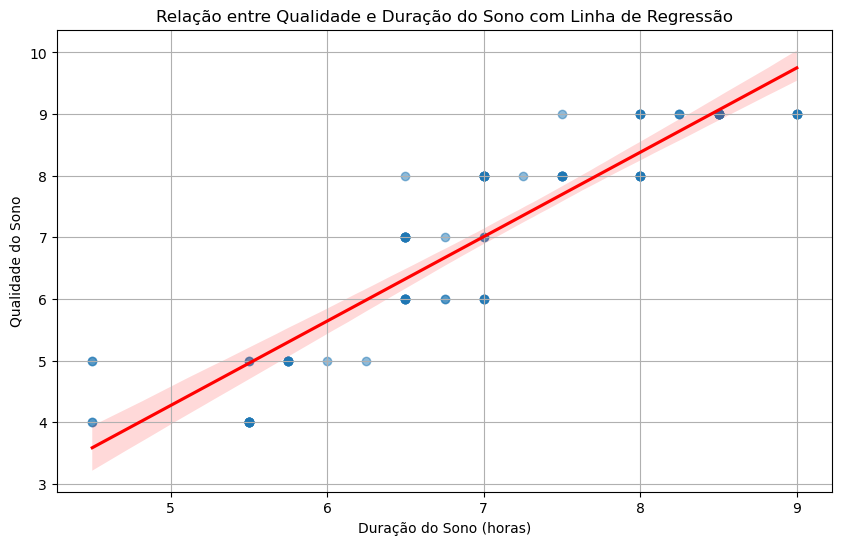

In [450]:
# Qualidade do Sono vs Duração do Sono
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep Duration', y='Sleep Quality', data=df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relação entre Qualidade e Duração do Sono com Linha de Regressão')
plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Qualidade do Sono')
plt.grid(True)
plt.show()

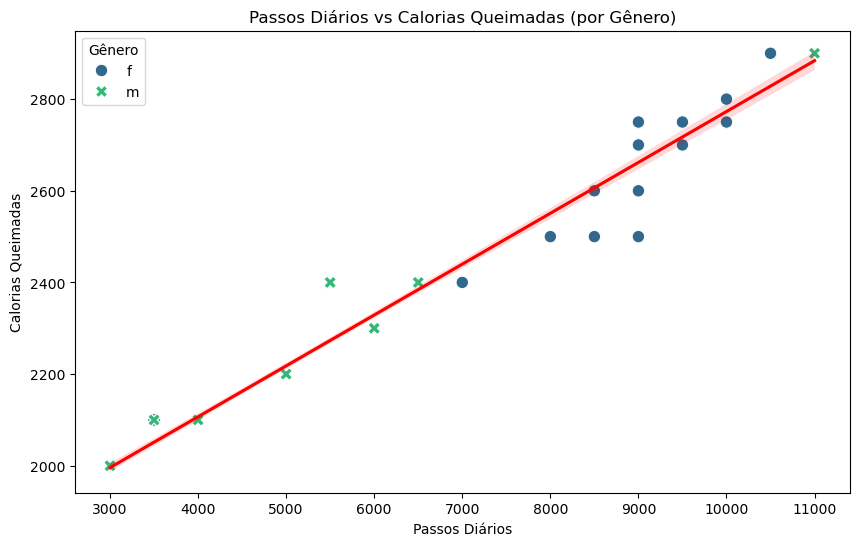

In [451]:
# Qualidade do Sono vs Passos Díarios (por Gênero)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Daily Steps',
    y='Calories Burned',
    hue='Gender', # Diferentes cores por gênero
    style='Gender', # Diferentes marcadores por gênero
    data=df,
    palette='viridis',
    s=80 # Tamanho dos pontos
)
sns.regplot(x='Daily Steps', y='Calories Burned', data=df, scatter=False, color='red') # Linha de regressão
plt.title('Passos Diários vs Calorias Queimadas (por Gênero)')
plt.xlabel('Passos Diários')
plt.ylabel('Calorias Queimadas')
plt.legend(title='Gênero')
plt.show()

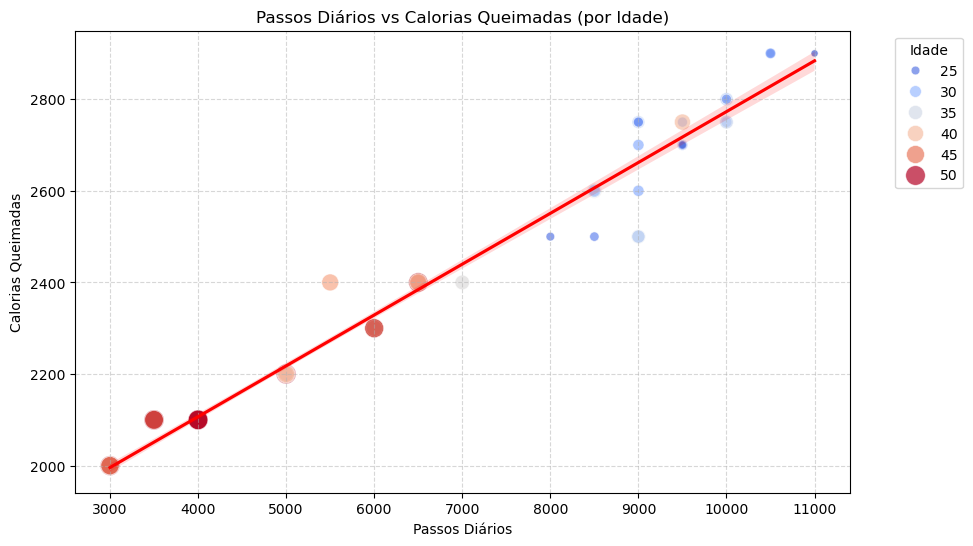

In [452]:
# Passos diários vs Calorias Queimadas (por Idade) 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Daily Steps', 
    y='Calories Burned', 
    size='Age',  # Tamanho do ponto varia com outra variável (ex: frequência cardíaca)
    sizes=(20, 200),  # Range de tamanhos
    hue='Age',  # Cor também varia
    alpha=0.7,
    data=df,
    palette='coolwarm'
)
sns.regplot(x='Daily Steps', y='Calories Burned', data=df, scatter=False, color='red')  # Linha de regressão
plt.title('Passos Diários vs Calorias Queimadas (por Idade)')
plt.xlabel('Passos Diários')
plt.ylabel('Calorias Queimadas')
plt.legend(title='Idade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

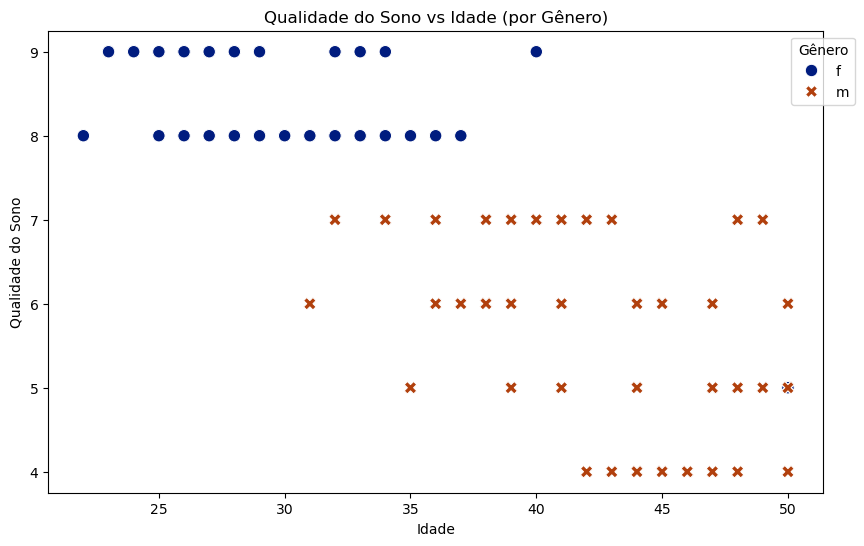

In [510]:
# Qualidade do Sono vs Idade (por Gênero)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Sleep Quality',
    hue='Gender', # Diferencia por gênero
    style='Gender', # Marcadores diferentes
    palette='dark', # Cores distintas
    data=df,
    s=80 # Tamanho dos pontos
)
plt.title('Qualidade do Sono vs Idade (por Gênero)')
plt.xlabel('Idade')
plt.ylabel('Qualidade do Sono')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1))
plt.show()

 ### Passo 4: Análise exploratória
Aqui vamos explorar a relação entre variáveis como "Sleep Quality", "Daily Steps", "Physical Activity Level" e "Dietary Habits".

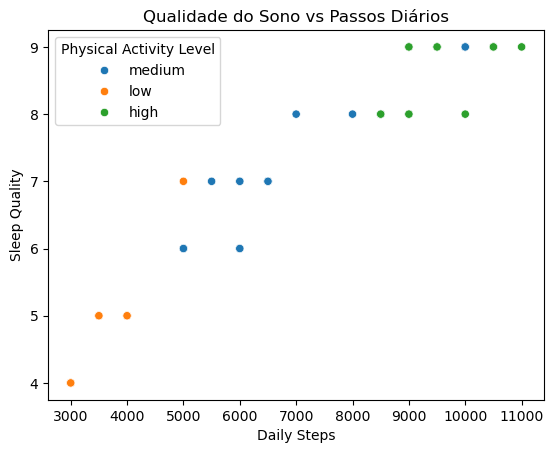

In [455]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: relação entre Sleep Quality e Daily Steps
sns.scatterplot(x='Daily Steps', y='Sleep Quality', hue='Physical Activity Level', data=dados)
plt.title('Qualidade do Sono vs Passos Diários')
plt.show()


### Passo 5: Análise estatística
Podemos calcular correlações entre as variáveis numéricas, como passos diários e calorias queimadas.


In [457]:
# Correlação entre variáveis numéricas
correlacoes = dados[['Sleep Quality', 'Daily Steps', 'Calories Burned']].corr()
correlacoes

,Sleep Quality,Daily Steps,Calories Burned
Sleep Quality,1.000000,0.976277,0.973557
Daily Steps,0.976277,1.000000,0.986750
Calories Burned,0.973557,0.986750,1.000000


### Passo 6: Modelagem preditiva
Uma abordagem interessante seria construir um modelo que possa prever a qualidade do sono com base em características como nível de atividade física, dieta, uso de medicamentos, etc.

In [459]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separar as variáveis independentes e dependentes
X = dados[['Daily Steps', 'Calories Burned', 'Physical Activity Level', 'Dietary Habits']]
y = dados['Sleep Quality']

# Converter colunas categóricas
X = pd.get_dummies(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de regressão
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

# Avaliar o modelo
print(f'Acurácia do modelo: {modelo.score(X_test, y_test)}')


Acurácia do modelo: 0.9689086576648134


### Passo 7: Conclusão
Após a modelagem, você poderá verificar quais variáveis têm mais impacto na qualidade do sono e também explorar recomendações baseadas nos resultados.